## Проект по предпочтениям американскими студентами ВУЗов 

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

In [2]:
uni = pd.read_excel('IPEDS_data.xlsx')
uni 

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


In [3]:
uni.info(max_cols=len(uni))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 145 columns):
 #    Column                                                                                  Non-Null Count  Dtype  
---   ------                                                                                  --------------  -----  
 0    ID number                                                                               1534 non-null   int64  
 1    Name                                                                                    1534 non-null   object 
 2    year                                                                                    1534 non-null   int64  
 3    ZIP code                                                                                1534 non-null   object 
 4    Highest degree offered                                                                  1534 non-null   object 
 5    County name                                                 

In [4]:
#Разберемся с NAN
na1 = uni.isna().sum()
na = na1.sort_values(ascending=False)
display(na.head(25))
# для дальнейшего нализа найдем столбцы, в которых больше 20% пропущенных данных
proc = na1/len(uni)*100
display(proc)

Endowment assets (year end) per FTE enrollment (GASB)                             1018
SAT Writing 25th percentile score                                                  820
SAT Writing 75th percentile score                                                  820
Number of first-time undergraduates - foreign countries                            623
Percent of first-time undergraduates - out-of-state                                623
Number of first-time undergraduates - out-of-state                                 623
Percent of first-time undergraduates - in-state                                    623
Number of first-time undergraduates - in-state                                     623
Number of first-time undergraduates - residence unknown                            623
Percent of first-time undergraduates - residence unknown                           623
Percent of first-time undergraduates - foreign countries                           623
Endowment assets (year end) per FTE enrollm

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

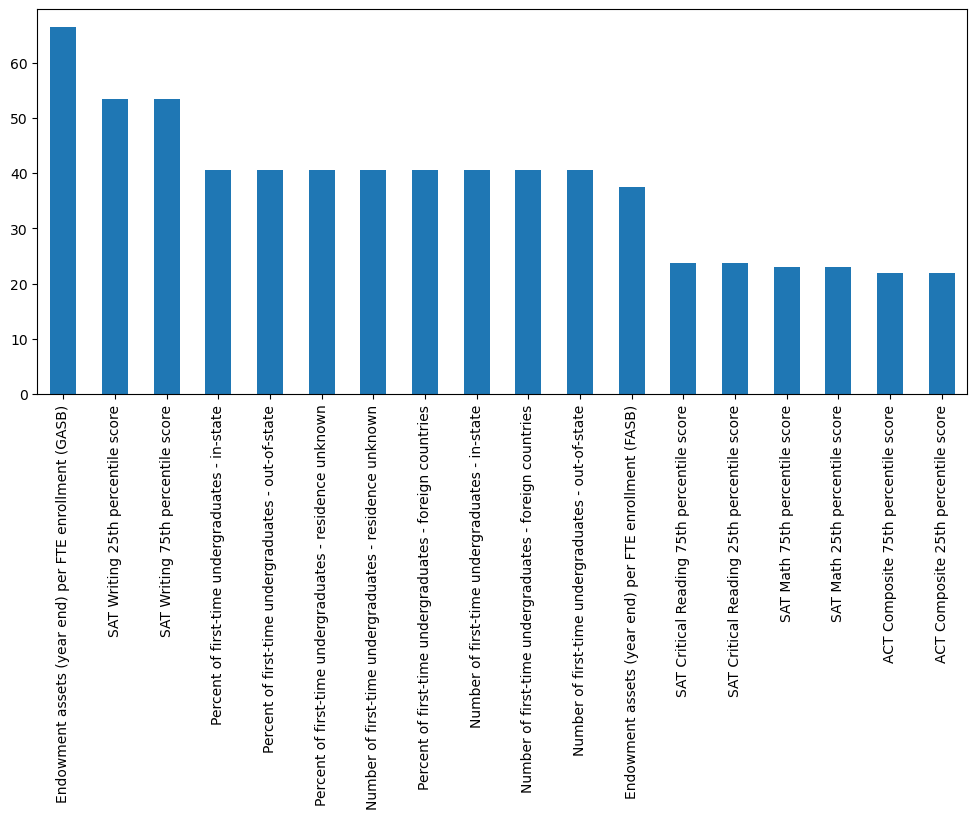

In [5]:
#ax=proc[proc>=20].plot.bar(figsize=(12,5));
more20 = proc[proc >= 20]
vm = more20.sort_values(ascending = False)
vm.plot(kind = 'bar', figsize=(12,5));

In [6]:
column = na1[na1 >= (0.2*len(uni))]
list_column = column.index.to_list()
list_column

['SAT Critical Reading 25th percentile score',
 'SAT Critical Reading 75th percentile score',
 'SAT Math 25th percentile score',
 'SAT Math 75th percentile score',
 'SAT Writing 25th percentile score',
 'SAT Writing 75th percentile score',
 'ACT Composite 25th percentile score',
 'ACT Composite 75th percentile score',
 'Number of first-time undergraduates - in-state',
 'Percent of first-time undergraduates - in-state',
 'Number of first-time undergraduates - out-of-state',
 'Percent of first-time undergraduates - out-of-state',
 'Number of first-time undergraduates - foreign countries',
 'Percent of first-time undergraduates - foreign countries',
 'Number of first-time undergraduates - residence unknown',
 'Percent of first-time undergraduates - residence unknown',
 'Endowment assets (year end) per FTE enrollment (GASB)',
 'Endowment assets (year end) per FTE enrollment (FASB)']

In [7]:
uni_copy = uni.copy()
uni_copy.drop(list_column, axis=1, inplace=True)
uni_copy

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,100.0,100.0,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,100.0,100.0,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0


In [8]:
un_columns = uni_copy[['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree", "Offers Master's degree","Offers Doctor's degree - research/scholarship", "Offers Doctor's degree - professional practice", 'Applicants total', 'Admissions total', 'Enrolled total', 'Estimated enrollment, total', 'Tuition and fees, 2013-14', 'Total price for in-state students living on campus 2013-14', 'Total price for out-of-state students living on campus 2013-14',
'State abbreviation', 'Control of institution', 'Total  enrollment', 'Full-time enrollment', 'Part-time enrollment','Undergraduate enrollment', 'Graduate enrollment','Full-time undergraduate enrollment', 'Part-time undergraduate enrollment',
'Percent of total enrollment that are women', 'Percent of undergraduate enrollment that are women', 'Percent of graduate enrollment that are women', 'Graduation rate - Bachelor degree within 4 years, total', 'Graduation rate - Bachelor degree within 5 years, total','Graduation rate - Bachelor degree within 6 years, total']]
un_columns

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


In [9]:
un_columns[un_columns['Total  enrollment'].isna()]
# в данных строках дф в интересующих нас столбцах стоят пропуски и нет данных о количестве зачисленных абитуриентов, поэтому нас не интересуют данные строки

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
257,University of North Georgia,2013,Doctor's degree - professional practice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,2013,Doctor's degree - research/scholarship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
a_index = un_columns[un_columns['Name'] == 'University of North Georgia'].index
b_index = un_columns[un_columns['Name'] == 'Texas A & M University-Galveston'].index
un_columns = un_columns.drop(a_index, axis=0)
un_columns = un_columns.drop(b_index, axis=0)
un_columns

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


## Несовместимые значения 

In [16]:
un_columns.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Здесь видно, что есть некоторые университеты, в которые было подано 0 заявлений, 
#всего 0 зачислений. Это противоречивые значения и с ними надо разобраться.

In [17]:
colvo_zero = (un_columns[un_columns.loc[0:]==0]).count().sum()
colvo_zero 

395

In [ ]:
# получается, что в данной таблице есть 395 значений, в которых в столбце заявления стоят нули

In [18]:
# перепишем нули на Nan
un_columns.replace(0,np.nan,inplace=True)
colvo_zero_nw = un_columns[un_columns.loc[0:]==0].count().sum()
colvo_zero_nw

0

In [19]:
un_columns[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


#### Теперь, чтобы использовать имена столбцов в качестве свойств и воспользоваться этим, необходимо удалить некоторые специальные символы, которые содержат некоторые имена столбцов, например, апостроф, дефис, кавычки, двоеточие и косую черту . Кроме того, некоторые имена столбцов содержат пробелы между словами и эти пробелы также будут удалены.


In [20]:
un_columns.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 yea

In [21]:
def del_space(list_headers,charact):
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [22]:
def remove_ch(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers 

In [24]:
headers = del_space(un_columns.columns,[' - ',' '])
headers

['Name',
 'year',
 'Highest_degree_offered',
 "Offers_Bachelor's_degree",
 "Offers_Master's_degree",
 "Offers_Doctor's_degree_research/scholarship",
 "Offers_Doctor's_degree_professional_practice",
 'Applicants_total',
 'Admissions_total',
 'Enrolled_total',
 'Estimated_enrollment,_total',
 'Tuition_and_fees,_2013-14',
 'Total_price_for_in-state_students_living_on_campus_2013-14',
 'Total_price_for_out-of-state_students_living_on_campus_2013-14',
 'State_abbreviation',
 'Control_of_institution',
 'Total__enrollment',
 'Full-time_enrollment',
 'Part-time_enrollment',
 'Undergraduate_enrollment',
 'Graduate_enrollment',
 'Full-time_undergraduate_enrollment',
 'Part-time_undergraduate_enrollment',
 'Percent_of_total_enrollment_that_are_women',
 'Percent_of_undergraduate_enrollment_that_are_women',
 'Percent_of_graduate_enrollment_that_are_women',
 'Graduation_rate_Bachelor_degree_within_4_years,_total',
 'Graduation_rate_Bachelor_degree_within_5_years,_total',
 'Graduation_rate_Bachelor_d

In [26]:
headers=remove_ch(headers,["'",',',':','-','/'])
headers

['Name',
 'year',
 'Highest_degree_offered',
 'Offers_Bachelors_degree',
 'Offers_Masters_degree',
 'Offers_Doctors_degree_research_scholarship',
 'Offers_Doctors_degree_professional_practice',
 'Applicants_total',
 'Admissions_total',
 'Enrolled_total',
 'Estimated_enrollment_total',
 'Tuition_and_fees_2013_14',
 'Total_price_for_in_state_students_living_on_campus_2013_14',
 'Total_price_for_out_of_state_students_living_on_campus_2013_14',
 'State_abbreviation',
 'Control_of_institution',
 'Total__enrollment',
 'Full_time_enrollment',
 'Part_time_enrollment',
 'Undergraduate_enrollment',
 'Graduate_enrollment',
 'Full_time_undergraduate_enrollment',
 'Part_time_undergraduate_enrollment',
 'Percent_of_total_enrollment_that_are_women',
 'Percent_of_undergraduate_enrollment_that_are_women',
 'Percent_of_graduate_enrollment_that_are_women',
 'Graduation_rate_Bachelor_degree_within_4_years_total',
 'Graduation_rate_Bachelor_degree_within_5_years_total',
 'Graduation_rate_Bachelor_degree_wi

In [27]:
list_new_header=list()
for header in headers:
    header=header.casefold() 
    if "degrese" in header:  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [29]:
un_columns.columns=list_new_header
un_columns.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'total__enrollment',
       'full_time_enrollment', 'part_time_enrollment',
       'undergraduate_enrollment', 'graduate_enrollment',
       'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       '

In [30]:
# изменим для удобства название 
un_columns.rename(columns={'state_abbreviation':'state'}, inplace=True)
un_columns[['state']].head(2)

,state
0,Alabama
1,Alabama


# Визуализация 

In [32]:
# зададим единый фон для всех графиков 
matplotlib.rcParams['figure.facecolor']='whitesmoke'

In [33]:
with pd.option_context('display.max_columns',None):
    display(un_columns.describe())

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,total__enrollment,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Заметим, что в 2013 г. в один вуз поступило более 72 000 заявлений, тогда как другой получил только 4 заявки в том же году. Посмотрим, в какие вузы поступило наибольшее количество заявок.

In [35]:
high_app = un_columns[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)
high_app

,name,applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


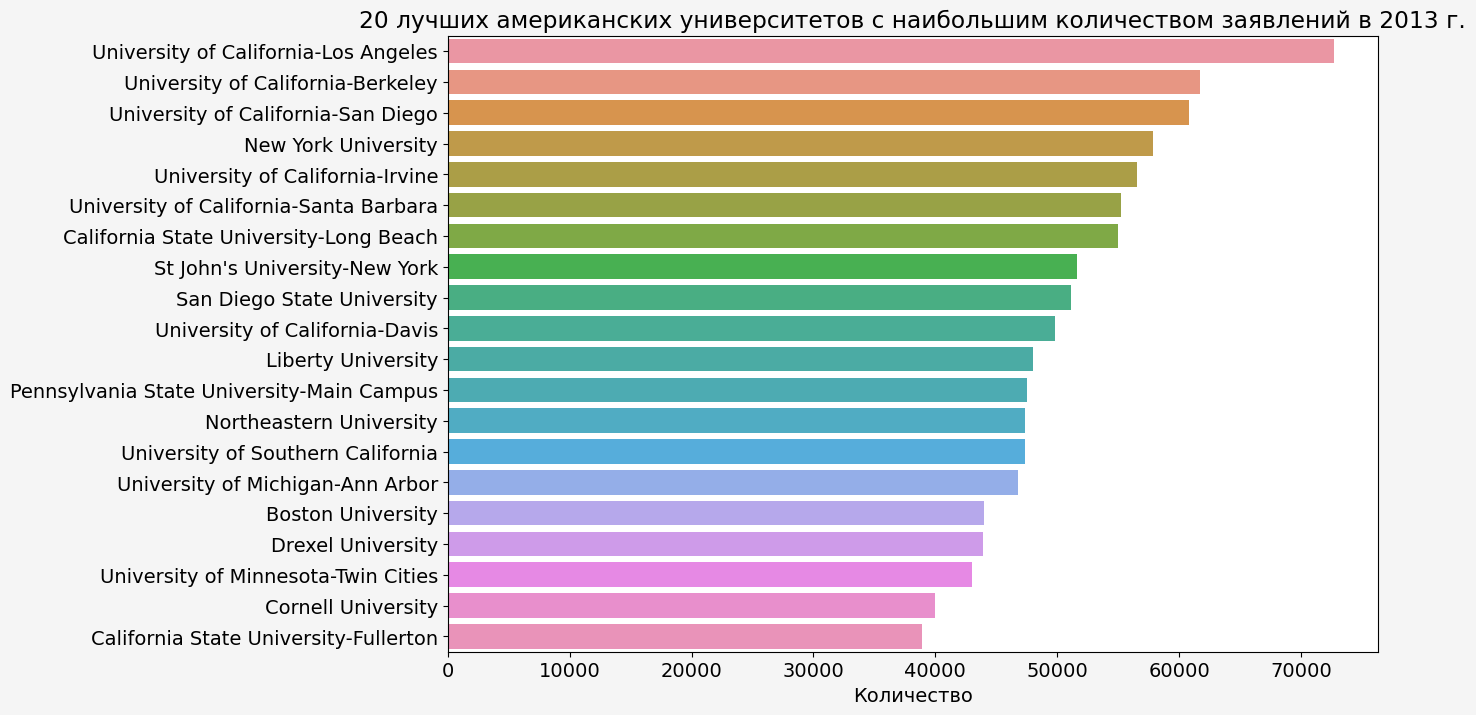

In [38]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=14
sns.barplot(x='applicants_total',y='name',data=high_app)
plt.title('20 лучших американских университетов с наибольшим количеством заявлений в 2013 г.')
plt.xlabel('Количество')
plt.ylabel('');

###  Может быть, что университеты с наибольшим количеством заявлений являются предпочтительными для студентов. Однако один студент может подать несколько заявлений одновременно, но предпочтительным может быть только один университет. Другие университеты могут быть только в случае непопадания  в предпочитаемый. Чтобы выяснить, являются ли университеты с наибольшим количеством заявлений предпочтительными, давайте найдем некоторые отношения с количеством поступивших и зачисленных.

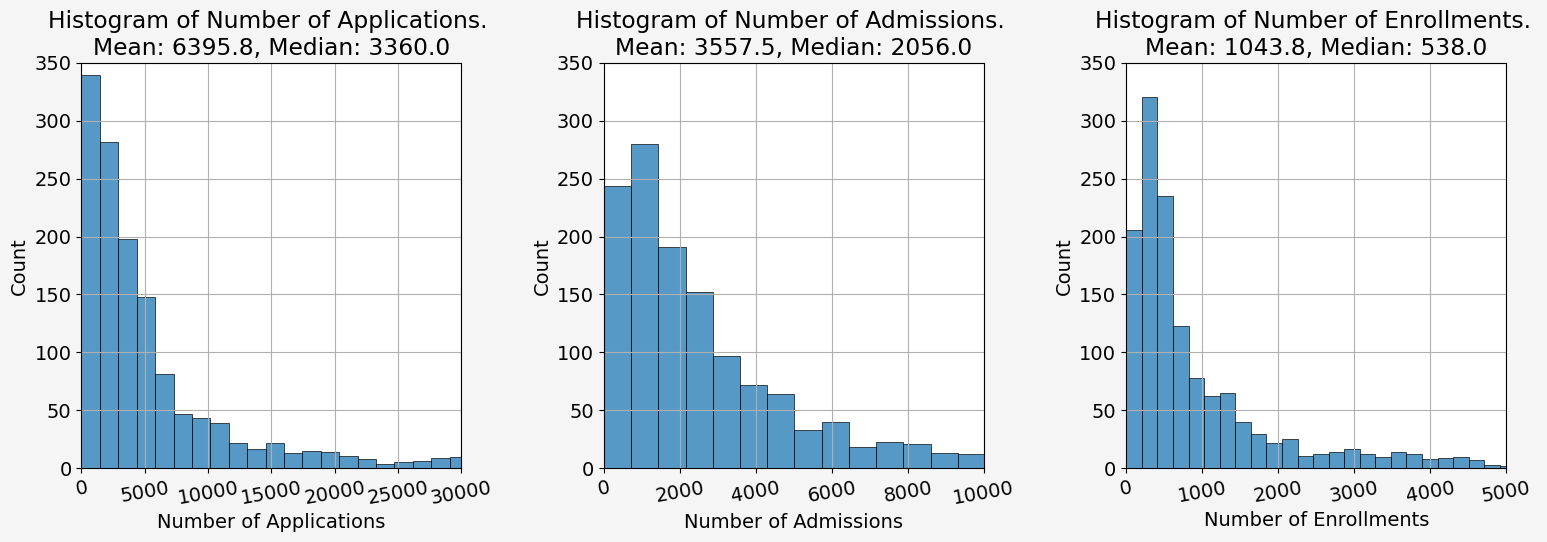

In [41]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(un_columns.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(un_columns.applicants_total.mean(),un_columns.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(un_columns.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(un_columns.admissions_total.mean(),un_columns.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(un_columns.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(un_columns.enrolled_total.mean(),un_columns.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

### Отсюда видно, что в большинство вузов поступило менее 5000 заявок. Мы также видим, что среднее количество поступлений намного ниже, чем количество заявлений. В 2013 г. большинство университетов приняли менее 2000 студентов, однако некоторые другие университеты представили более 10000 поступлений. Поскольку высокий процент поступления может означать высокую вероятность быть принятым, мы можем задать вопрос: предпочитают ли студенты университеты с высокой вероятностью поступления? Поставим также 2 важных вопроса 1)  Может ли количество заявлений говорить нам о том, что университет является одним из наиболее предпочтительных для студентов? 2) Предпочитают ли студенты университет, в который им легче поступить?

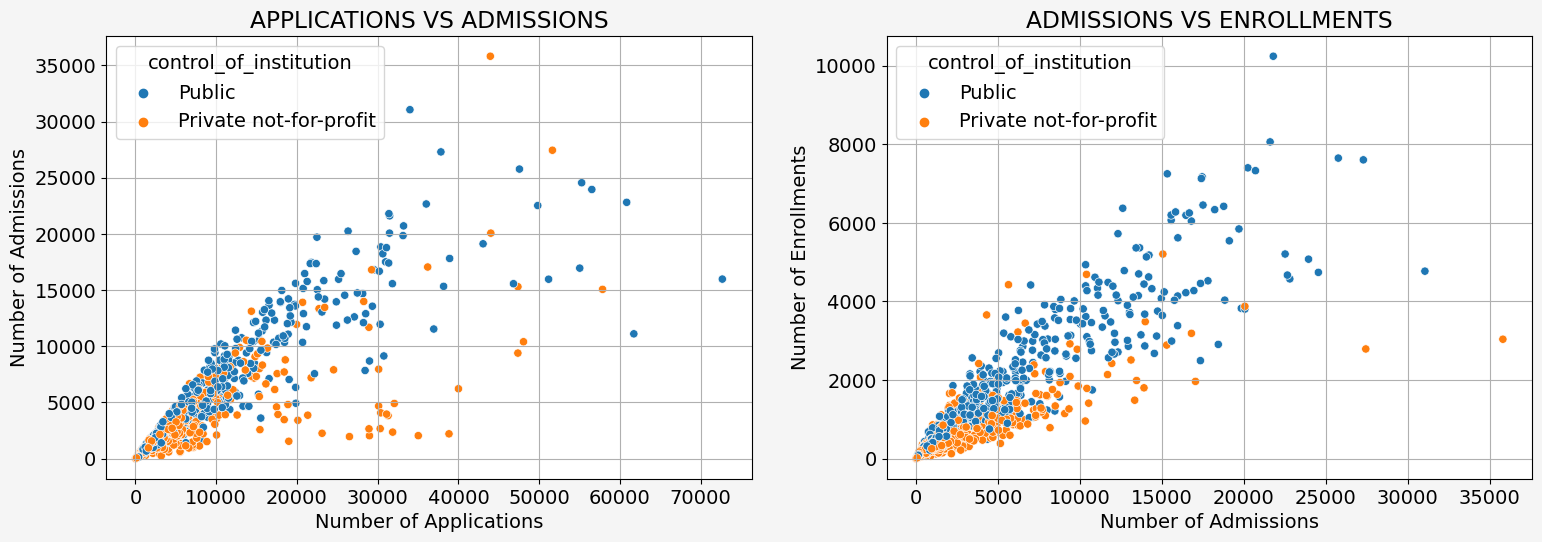

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=un_columns.admissions_total,x=un_columns.applicants_total,hue=un_columns.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=un_columns,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [ ]:
# Если мы посмотрим на левый рисунок, то увидим, что, за некоторыми исключениями, университеты с большим количеством заявлений
# также имеют большое количество поступлений, и наоборот. Однако университеты с наибольшим количеством заявлений не являются 
# университетами с наибольшим количеством поступлений. Кроме того, есть ряд частных университетов с большим количеством абитуриентов,
# но число поступивших в них довольно низкое.


### Найдем уровень приема и уровень зачисления 

In [47]:
un_columns['acceptance_rate']=(un_columns.admissions_total/un_columns.applicants_total*100).round(2)
un_columns['enrollment_rate']=(un_columns.enrolled_total/un_columns.admissions_total*100).round(2)
un_columns

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,acceptance_rate,enrollment_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.89,20.00
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.73,35.93
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0,NaN,NaN
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.62,39.31
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.25,28.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN,34.61,63.24
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0,71.15,5.89
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,NaN,52.0,52.0,NaN,46.0,54.0,54.0,53.28,30.77


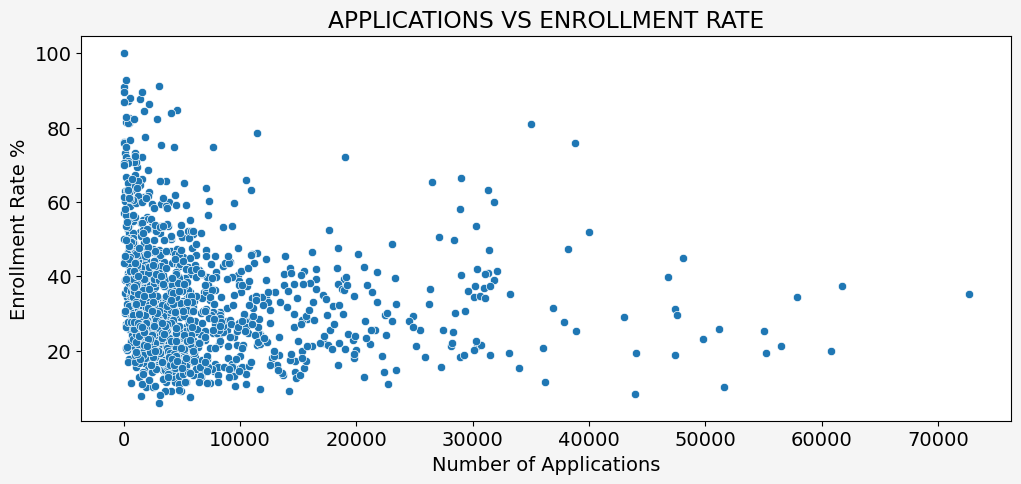

In [49]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=un_columns)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

In [51]:
high_acceptance = un_columns[un_columns.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [54]:
low_acceptance=un_columns[un_columns.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

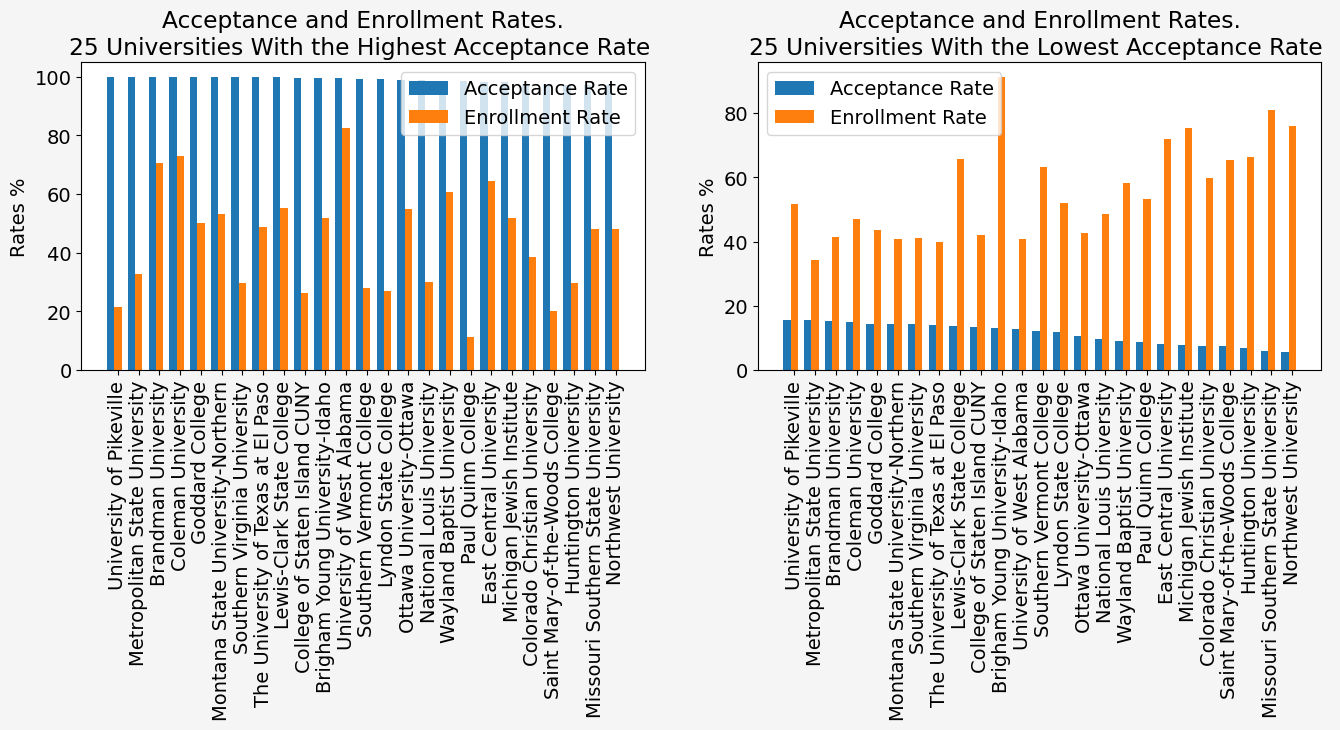

In [55]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance))
width = 0.35 

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) 
width = 0.35       

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

#### На этой диаграмме видно, что не существует четкой закономерности между количеством  зачислений и университетами с высоким уровнем зачисления 

### Студенты предпочитают частные или государственные вузы?

In [56]:
private = un_columns[un_columns.control_of_institution=='Private not-for-profit']
private = private[private.applicants_total.notnull()]
public = un_columns[un_columns.control_of_institution=='Public']
public = public[public.applicants_total.notnull()]

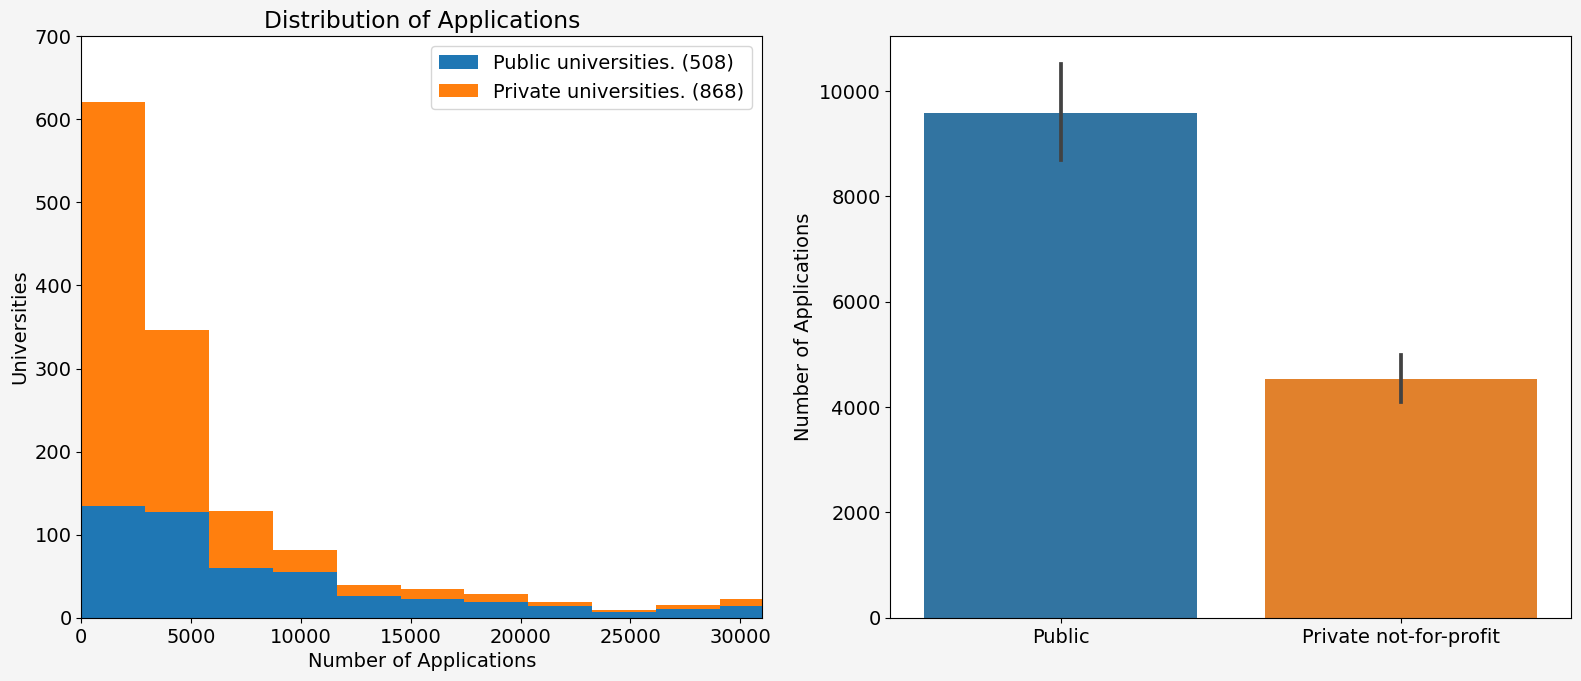

In [61]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([public.applicants_total,private.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(public)),'Private universities. ({})'.format(len(private))]);

plt.subplot(1,2,2)
sns.barplot(x =un_columns.control_of_institution,y=un_columns.applicants_total);
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

#### Согласно этим цифрам, среднее количество заявлений, полученных в государственных университетах в 2013 г., практически вдвое превышает среднее количество заявлений, полученных в том же году частными университетами (для государственных университетов: около 9000, для частных университетов: около 4000). На данный момент важно подчеркнуть, что количество государственных университетов в этом наборе данных составляет 508 университетов; тогда как количество частных составляет 868 университетов.